In [1]:
%matplotlib inline

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def process_log(logfname):
    errs = {}
    top1s = {}
    import re
    p = re.compile('Epoch: \[(\d+)\]\[(\d+)\/(\d+)\]\s+Time\s+(\d+\.\d+)\s+Err\s+(\d+\.\d+)\s+Top1\-\%\:\s+(\d+\.\d+)\s+LR\s+([\de\-]+)\s+DataLoadingTime\s+(\d+\.\d+)*')
    with open(logfname) as log:
        contents = log.readlines()
        print len(contents)," of log lines to process"
        iteration_logs = [ p.match(l) for l in contents if p.match(l)]
        print len(iteration_logs)," of iteration log lines to process"
        it = 0
        epoch = 0
        print "Start Processing Logs..."
        for log in iteration_logs:
                #print log.groups()
                epoch,it,total_iters,time,err,top1,lr,loadt= [eval(n) for n in log.groups()]
                errs[epoch] = errs.get(epoch, np.zeros(total_iters+1))
                errs[epoch][it] = err
                top1s[epoch] = top1s.get(epoch, np.zeros(total_iters+1))
                top1s[epoch][it] = top1
        print "Done Log Processing."
        #return the errs, top1 accuracy and the last epoch and last iteration
        return errs,top1s,epoch,it

In [54]:
#process the logs, specify the location of the log file here
errs,top1s,last_epoch,last_it = process_log('/home/user/shane/soumith-imgnet-training/gv2-1.log')

8183  of log lines to process
7604  of iteration log lines to process
Start Processing Logs...
Done Log Processing.


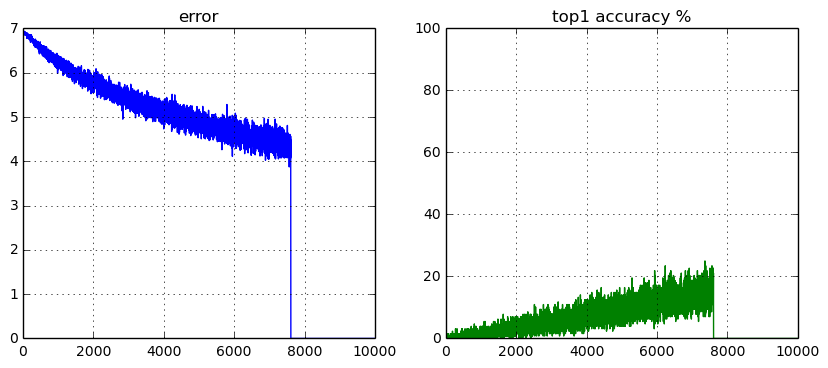

In [56]:
#plot the learning curve of one epoch
plt.figure(1,figsize=(10, 4))
#plot the error
plt.subplot(121)
plt.title('error')
plt.plot(errs[1][1:])
plt.grid(True)
#plot the top 1 accuracy
plt.subplot(122)
plt.title('top1 accuracy %')
plt.plot(top1s[1][1:],color='green')
plt.ylim((0,100))
plt.grid(True)

the last epoch/iteration in log is  1 / 7604


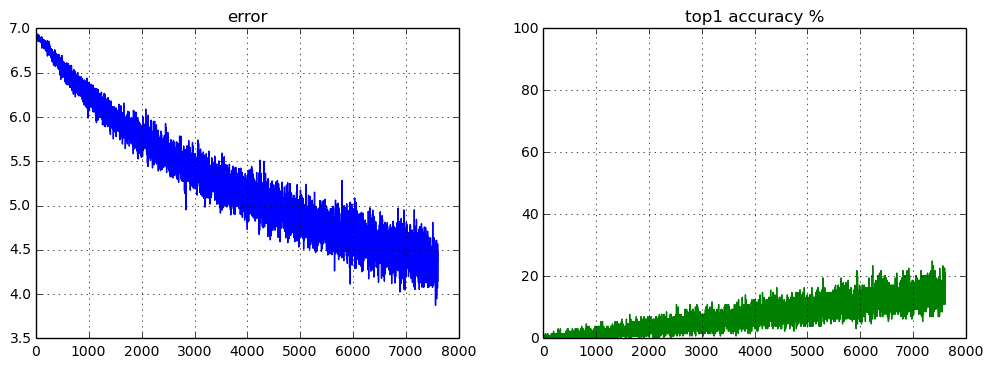

In [57]:
#concatenate all errs and top1accuary and plot
print "the last epoch/iteration in log is ",last_epoch,'/',last_it
#calculate all errors

all_errs = []
[all_errs.append(errs[i][1:]) for i in range(1,last_epoch)]
all_errs.append(errs[last_epoch][1:last_it+1])
#calculate all top1 acccuracy
all_top1s = []
[all_top1s.append(top1s[i][1:]) for i in range(1,last_epoch)]
all_top1s.append(top1s[last_epoch][1:last_it+1])

#plot the erros and top1 accuracy in all epochs
plt.figure(2,figsize=(12, 4))
plt.subplot(121)
plt.title('error')
plt.plot(np.concatenate(all_errs,axis=0))
plt.grid(True)
plt.subplot(122)
plt.title('top1 accuracy %')
plt.plot(np.concatenate(all_top1s,axis=0),color='green')
plt.ylim((0,100))
plt.grid(True)